### Assignment Questions
### 1. Consider the training data set with y = ||x||^2.
### (a) Pick x1, x2, . . . , x10000 ∈ R^2 so that xi’s are i.i.d. ∼ Unif[−10, 10]2.
### Generate yi values using the expression given above.

In [2]:

import numpy as np
np.random.seed(42)

# Generate 10000 samples from a uniform distribution in the range [-10, 10]
x = np.random.uniform(low=-10, high=10, size=(10000, 2))
print(x.shape)
# Calculate the squared Euclidean norm of each sample
y = np.sum(x**2, axis=1)

(10000, 2)


### (b) Consider the feed-forward neural network with single hidden layer.
### Choose the right number of nodes in the hidden layer, M, so as to
### minimize the squared error. It is sufficient to consider M ≤ 10. Fit
### the training data using the command sklearn.neural network.MLPRegressor.
### Use ReLU activation function between input-hidden layers. Print
### the training error.


In [3]:
from sklearn.neural_network import MLPRegressor
for M in range(1 , 11):
    model = MLPRegressor(hidden_layer_sizes=(M,), activation='relu', random_state=42)
    model.fit(x, y)
    train_error = np.mean((model.predict(x) - y)**2)
    print(f"M={M}, train error={train_error}")

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


M=1, train error=3076.546286561643


C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


M=2, train error=3019.8892470703686


C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


M=3, train error=931.657824866067


C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


M=4, train error=217.48534557665428


C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


M=5, train error=164.70142513954485


C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


M=6, train error=159.27621799653838


C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


M=7, train error=83.08926534088019


C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


M=8, train error=61.40690736014445


C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


M=9, train error=57.091024942802974
M=10, train error=37.530684734815566


C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### (c) Generate 10,000 test vectors x1, x2, . . . , x10000 ∈ R^2 i.i.d. ∼Unif[−10, 10]^2,
### and test them on the trained networks. Print the test error. Plot
### g(x, y) = x^2 + y^2 in 3D for x ∈ [−5, 5] and y ∈ [−5, 5]. Plot the prediction by neural networks in the same plot.

In [4]:
x_test = np.random.uniform(low=-10, high=10, size=(10000, 2))
y_test = np.sum(x_test**2,axis = 1)
model.predict(x_test)
test_error = np.mean((model.predict(x_test) - y_test)**2)
print(f"M={M}, test error={test_error}")


M=10, test error=36.622594192234544


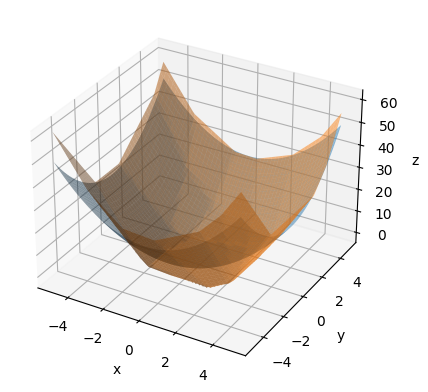

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function g(x, y) = x^2 + y^2
def g(x, y):
    return x**2 + y**2

# Compute the predicted outputs of the neural network on a grid
X_grid = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_flat = np.column_stack([X_grid[0].ravel(), X_grid[1].ravel()])
y_pred = model.predict(X_flat).reshape(X_grid[0].shape)

# Plot the function g(x, y) and the predicted outputs of the neural network
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid[0], X_grid[1], g(X_grid[0], X_grid[1]), alpha=0.5,label='True function')
ax.plot_surface(X_grid[0], X_grid[1], y_pred, alpha=0.5,label='Neural network')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
